In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def integral_image(image):
    res = [[0 for _ in range(len(image[0]))] for _ in range(len(image))]
    for i in range(len(image)):
        for j in range(len(image[0])):
            res[i][j] = image[i][j]
            if (i > 0 and j > 0):
                res[i][j] -= res[i - 1][j - 1]
            if (i > 0):
                res[i][j] += res[i - 1][j]
            if (j > 0):
                res[i][j] += res[i][j - 1]
    return res
            

In [16]:
def local_sum(image, p0, p1):
    x0, y0 = p0
    x1, y1 = p1
    lower_right = image[x1][y1]
    upper_right = image[x0 - 1][y1] if x0 > 0 else 0
    lower_left = image[x1][y0 - 1] if y0 > 0 else 0
    upper_left = image[x0 - 1][y0 - 1] if (x0 > 0 and y0 > 0) else 0
    return lower_right - upper_right - lower_left + upper_left

In [17]:
def extract_detected_eye(image, center, w):
    m = 0.15 * w
    cx, cy = center
    x0 = int(cx - int(0.5 * m))
    y0 = int(cy - 0.5 * w)
    x1 = int(cx + int(2 * m))
    y1 = int(cy + 0.5 * w)
    res = [[image[x0 + i][y0 + j] for j in range(y1 - y0 + 1)] for i in range(x1 - x0 + 1)]
    return res
    

In [18]:
def compute_points(center, w):
    m = 0.15 * w
    cx, cy = center
    p1 = (cx - 0.5 * m, cy - 0.5 * w)
    p2 = (cx, cy - 0.05 * w)
    p3 = (cx, cy -0.5 * w)
    p4 = (cx + 0.5 * m, cy -0.05 * w)
    p5 = (cx -0.5 * m, cy + 0.05 * w)
    p6 = (cx, cy + 0.5 * w)
    p7 = (cx, cy + 0.05 * w)
    p8 = (cx + 0.5 * m, cy + 0.5 * w)
    p9 = (cx + 0.833 * m, cy - 0.325 * w)
    p10 = (cx + 2 * m, cy - 0.225 * w)
    p11 = (cx + 0.833 * m, cy -0.1 * w)
    p12 = (cx + 2 * m, cy + 0.1 * w)
    p13 = (cx + 0.833 * m, cy + 0.225 * w)
    p14 = (cx + 2 * m, cy + 0.325 * w)
    res = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14]
    return [(round(x), round(y)) for (x,y) in res]

In [19]:
def convolve(image, points):
    ls1 = local_sum(image, points[0], points[1])
    ls2 = local_sum(image, points[2], points[3])
    ls3 = local_sum(image, points[4], points[5])
    ls4 = local_sum(image, points[6], points[7])
    ls5 = local_sum(image, points[8], points[9])
    ls6 = local_sum(image, points[10], points[11])
    ls7 = local_sum(image, points[12], points[13])
    return ls1 - ls2 + ls3 - ls4 - ls5 + ls6 - ls7

In [20]:
def apply_kernel(image, w):
    res = -1e20
    pos = (0, 0)
    m = 0.15 * w
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (j <= 0.5 * w or len(image[0]) - j <= 0.5 * w):
                continue
            if (i <= 0.5 * m or len(image) - i <= 2 * m):
                continue
            points = compute_points((i, j), w)
            val = convolve(image, points)
            if (val > res):
                res = val
                pos = (i, j)
    return pos

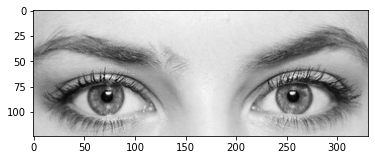

In [21]:
image = Image.open("f2.png").convert('L')
image_list = np.array(image).tolist()
integral = integral_image(image_list)
out = extract_detected_eye(image_list, apply_kernel(integral, 330), 330)
plt.imshow(Image.fromarray(np.uint8(out)), cmap=plt.get_cmap('gray'))

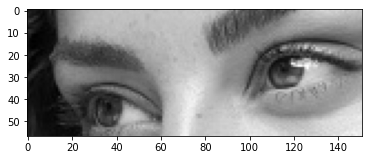

In [22]:
image = Image.open("f6.jpg").convert('L')
image_list = np.array(image).tolist()
integral = integral_image(image_list)
out = extract_detected_eye(image_list, apply_kernel(integral, 150), 150)
plt.imshow(Image.fromarray(np.uint8(out)), cmap=plt.get_cmap('gray'))

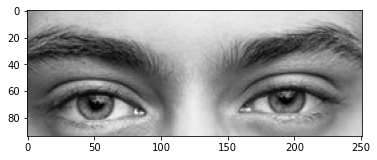

In [23]:
image = Image.open("f3.jpg").convert('L')
image_list = np.array(image).tolist()
integral = integral_image(image_list)
out = extract_detected_eye(image_list, apply_kernel(integral, 250), 250)
plt.imshow(Image.fromarray(np.uint8(out)), cmap=plt.get_cmap('gray'))